In [11]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, shape
import random
import matplotlib.pyplot as plt

gdf1 = gpd.read_file(r"C:\Users\HarshGarg\Desktop\DEFRA\priorityhabitatsgrasslandinventoryupdateaug2019.geojson")
gdf2 = gpd.read_file(r"C:\Users\HarshGarg\Desktop\DEFRA\Priority_Habitats_Inventory_England_7375124169757603116.geojson")

gdf = pd.concat([gdf1.to_crs(gdf2.crs)['geometry'], gdf2['geometry']], axis = 0)

gdf = gpd.GeoDataFrame(gdf, columns = ['geometry']).reset_index(drop=True)

# Calculate the area for each polygon and add a new column 'area' to the GeoDataFrame
gdf['area'] = gdf['geometry'].area

# Find the index of the polygon with the maximum area
max_area_index = gdf['area'].idxmax()

# Extract the biggest polygon based on the index
biggest_polygon = gdf.loc[max_area_index, 'geometry']

# Function to generate a random point inside a polygon
def random_point_inside_polygon(polygon):
    minx, miny, maxx, maxy = polygon.bounds
    while True:
        point = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if polygon.contains(point):
            return point

# Choose a random polygon
random_polygon = gdf.geometry[random.randint(0, len(gdf) - 1)]

# Generate a random point inside the chosen polygon
random_point_inside = random_point_inside_polygon(biggest_polygon)
#change biggest_polygon above to random_polygon for a random point in a random polygon

# Function to generate a random point outside the polygons
def random_point_outside_polygons(polygons):
    bounding_box = gdf.geometry.total_bounds
    minx, miny, maxx, maxy = bounding_box
    while True:
        point = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if not any(polygon.contains(point) for polygon in polygons):
            return point

# Generate a random point outside the polygons
random_point_outside = random_point_outside_polygons(gdf.geometry)

print("Random Point Inside Polygon:", random_point_inside)
print("Random Point Outside Polygons:", random_point_outside)

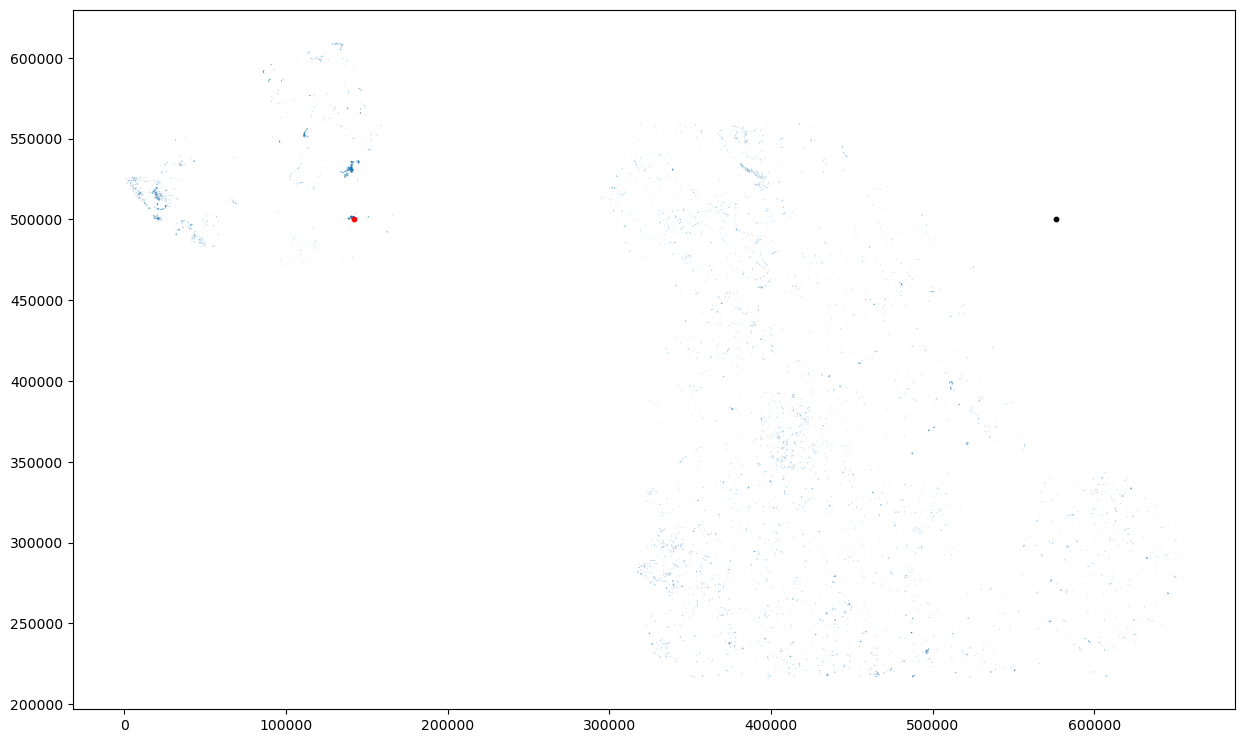

In [66]:
# Create a new GeoDataFrame with a single point
point_inside = gpd.GeoDataFrame(geometry=[Point(random_point_inside.x,random_point_inside.y)], crs=gdf.crs)

# Create a new GeoDataFrame with a single point
point_outside = gpd.GeoDataFrame(geometry=[Point(random_point_outside.x,random_point_inside.y)], crs=gdf.crs)

# Increase the size of the plot
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the GeoDataFrame
gdf.plot(ax=ax)

# Plot the point on top of the GeoDataFrame
point_inside.plot(ax=ax, color='red', marker='o', markersize=10)

# Plot the point on top of the GeoDataFrame
point_outside.plot(ax=ax, color='black', marker='o', markersize=10)

# Show the plot
plt.show()

In [ ]:
def check_point_location(point):
    is_inside = False
    for index, polygon in gdf.iterrows():
        if shape(polygon['geometry']).contains(point):
            is_inside = True
            break
    return is_inside